In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

In [11]:
def histogram_equalization(image):
    plt.figure(figsize=(15, 10))

    original_histogram = cv.calcHist([image], [0], None, [256], [0, 256])
    original_cdf = original_histogram.cumsum()
    original_cdf_normalized = original_cdf * float(original_histogram.max() / original_cdf.max())


    plt.subplot(2,3,1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')

    plt.subplot(2,3,4)
    plt.title('Original Histogram')
    plt.plot(original_histogram)
    plt.plot(original_cdf_normalized, color='b')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('No. of Pixels')

    equalized_image = cv.equalizeHist(image)
    equalized_histogram = cv.calcHist([equalized_image], [0], None, [256], [0, 256])
    equalized_cdf = equalized_histogram.cumsum()
    equalized_cdf_normalized = equalized_cdf * float(equalized_histogram.max() / equalized_cdf.max())    

    plt.subplot(2,3,2)
    plt.title('Equalized Image')
    plt.imshow(equalized_image, cmap='gray')

    plt.subplot(2,3,5)
    plt.title('Equalized Histogram')
    plt.plot(equalized_histogram)
    plt.plot(equalized_cdf_normalized, color='b')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('No. of Pixels')

    claheObj = cv.createCLAHE(clipLimit=5.0, tileGridSize=(8, 8))
    clahe_image = claheObj.apply(image)
    clahe_histogram = cv.calcHist([clahe_image], [0], None, [256], [0, 256])
    clahe_cdf = clahe_histogram.cumsum()
    clahe_cdf_normalized = clahe_cdf * float(clahe_histogram.max() / clahe_cdf.max())

    plt.subplot(2,3,3)
    plt.title('CLAHE Image')
    plt.imshow(clahe_image, cmap='gray')

    plt.subplot(2,3,6)
    plt.title('CLAHE Histogram')
    plt.plot(clahe_histogram)
    plt.plot(clahe_cdf_normalized, color='b')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('No. of Pixels')
    
    plt.show()

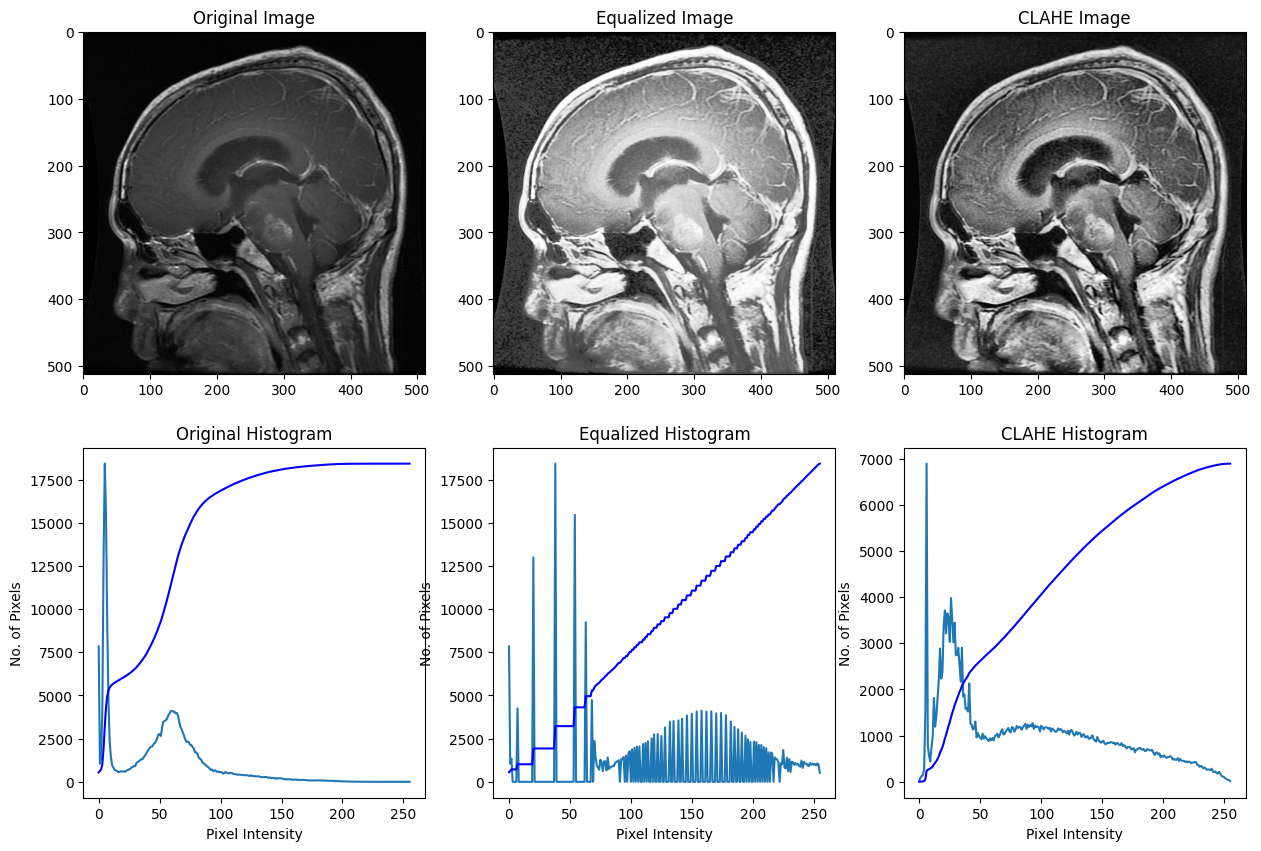

In [12]:
if __name__ == "__main__":
    # Segmentation task image sample
    image_path = 'E:/Code/Spiking-Visual-attention-for-Medical-image-segmentation/datasets/Brain Tumor Segmentation/images/2855.png' 

    histogram_equalization(cv.imread(image_path, cv.IMREAD_GRAYSCALE))